# 서포트 벡터 머신_분류
- 유방암 결과를 분류하는 서포트 벡터 머신 모델을 만들고 predict method를 이용하여 목표변수의 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix을 구하라.

#### 공통 패키지 불러오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# train, test를 분할하기 위한 함수
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family = "Malgun Gothic")

## 데이터 구성하기

#### 데이터 불러오기

In [5]:
df_raw = pd.read_csv("C:/Users/Myung-jin/21aibigdata/bigdata/유방암.CSV" , encoding = "euc-kr")
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


> 유방암.csv 데이터는 변수 31개, 자료 수가 320개로 이루어져 있다.

#### 결측치 확인

In [6]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

> 각 변수의 데이터 타입을 확인해보니 목표변수인 진단결과(diagnosis)가 이산형 변수임을 알 수 있다. 목표변수가 이산형이기 때문에 분류를 할 때 비선형 분류를 해야 한다. 비선형 서포트 벡터 머신 기법을 통해 분류를 해보자.

#### - 목표변수 변환 및 데이터 변환

In [9]:
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "양성", 1, 0)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


> 진단결과가 양성 혹은 음성으로 나뉘어지기 때문에 이 범주를 좀 더 쉽게 표현하고자 0, 1의 숫자로 표현을 변경했다.

In [10]:
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [11]:
df_raw_y.head()

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int32

#### - train, test 데이터 분할

In [12]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (192, 30)
train data Y size : (192,)
test data X size : (128, 30)
test data Y size : (128,)


## SVC 모델 생성

### 1 default parameter로 모델 생성

#### 1-1 default parameter로 모델 생성

In [13]:
svm_uncustomized = SVC(random_state = 1234)
svm_uncustomized.fit(df_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 0.885
Accucary on test set: 0.891


In [14]:
svm_uncustomized

SVC(random_state=1234)

> 기본 파라미터로 SVM 모델을 생성하였더니 train 데이터의 정확도가 88.5%, test 데이터의 정확도가 89.1%가 나왔다. 훈련 데이터와 테스트 데이터의 성능 차가 크지 않지만 둘 다 낮은 정확도(낮은 성능을 내는)가 나기 때문에 **과소적합(underfitting)이라는 것을 확인**할 수 있다. 훈련 데이터에서도 좀 더 잘 학습하면서 성능을 향상시켜보고자 한다.

#### 1-2 데이터 스케일링 후 default parameter로 모델 생성

- 커널 기법을 사용하는 SVM 분류 모형은 scale에 민감하기 때문에 정규화가 필요하다. 이론적으로 스케일링을 하면 좋은 것을 알고 있지만, 이를 실제로 비교 후 확인해보기 위해 진행해본다.

In [18]:
v_feature_name = df_train_x.columns

#표준정규분포로 스케일 조정
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [21]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, # 설명변수 데이터
                                                                test_size = 0.4, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


In [22]:
svm_scaled = SVC(random_state = 1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accucary on training set: 0.995
Accucary on test set: 0.961


> 설명변수에 대해 스케일링을 진행한 후 이 데이터를 토대로 SVM 모델을 생성하여 훈련 데이터와 테스트 데이터의 정확도를 측정해보았다.   
  
> 스케일링 전 -> 후  
train 데이터의 정확도 : 88.5% -> 99.5%   
test 데이터의 정확도가 89.1% -> 96.1%  
  
> 스케일링을 통해 훈련 데이터와 테스트 데이터의 성능이 향상되었고, 과소적합을 면하였다. 하지만 스케일링을 하니 훈련 데이터에 대해 **과대적합(overfitting)이 일어나는 것**을 알 수 있다. 이제 SVC의 파라미터 C와 gamma 값을 바꿔가며 모델에 적용해보고자 한다.

### 2. scale 조정 후 SVC 모델 생성

#### - parameter 변경 : c(cost)

In [42]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [10**c for c in range(-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.599,0.758
1,0.10,0.964,0.906
2,1.00,0.995,0.961
3,10.00,1.000,0.961


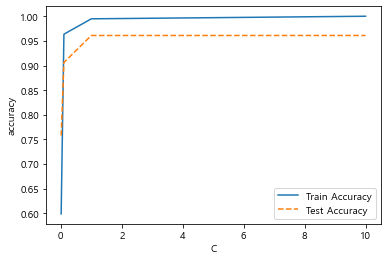

In [43]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

> c를 (0.01, 0.1, 1, 10)으로 설정했을 때 C가 1 초과일 때 train 데이터에서 과적합이 일어나고 test 데이터의 정확도의 변동이 없다. 그래서 c의 범위를 0.1 ~ 1.0으로 변경을 하였더니 C=1일 때 모델의 정확성이 가장 높고 성능차가 적음을 알 수 있다. 그래서 **C=1을 선택**하였다.

#### - parameter 변경 : Gamma

In [46]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [10**gamma for gamma in range(-3, 2)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.001,0.984,0.930
1,0.010,0.995,0.938
2,0.100,1.000,0.922
3,1.000,1.000,0.773
4,10.000,1.000,0.766


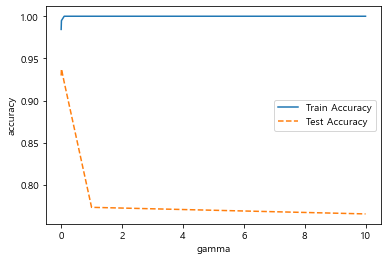

In [47]:
# 정확도를 그래프로 표현
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

> gamma를 (0.001, 0.01, 0.1, 1, 10)으로 설정했을 때 gamma가 0.1 이상이면 train 데이터에서 과적합이 일어난다. 그래서 과적합을 방지하고자 **gamma를 0.001로 선택**하였다.

## 최종 SVM 모델 선택

#### 최종 모델

In [51]:
svc_final = SVC(gamma = 0.01, C = 1, random_state = 1234)
svc_final.fit(df_scaled_train_x, df_train_y)

y_pred = svc_final.predict(df_scaled_test_x)
print(y_pred)
print()
print("Accuracy on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits =3))

[0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]

Accuracy on training set: 0.995
Accuracy on test set: 0.938

Confusion matrix: 
[[91  6]
 [ 2 29]]
              precision    recall  f1-score   support

           0      0.978     0.938     0.958        97
           1      0.829     0.935     0.879        31

    accuracy                          0.938       128
   macro avg      0.904     0.937     0.918       128
weighted avg      0.942     0.938     0.939       128



> predict 메소드를 통해 목표변수 y의 범주를 보았더니 범주는 0, 1이다.  
  
> 파라미터를 선정 후 새로운 SVC 모델을 만들었더니 train 정확도가 99.5%, test 정확도가 93.8%이다. 즉 test 데이터 기준으로 정분류율은 95.2%이다.

> 스케일링 전 -> 후 -> 스케일 후 파라미터 재설정   
train 데이터의 정확도 : 88.5% -> 99.5% -> 99.5%  
test 데이터의 정확도가 89.1% -> 96.1% -> 93.8%  

> confusion matrix는 정분류, 오분류율을 나타내는 행렬이다. 행렬을 봤을 때,  
>> 정확도는 예측을 제대로 하였는지 측도인데 120/128로 93.8%이므로 기존 모델보다 확실히 예측 성능이 좋아진 것을 알 수 있다. 즉 양성이라고 예측했을 때 실제 양성, 음성이라고 예측했을 때 실제 음성일 판단이 93.8% 맞다는 뜻이다.  
  
>> 유방암이 양성이라고 예측했을 때 실제로 양성일 확률인 정밀도는 29/35로 82.8%이므로 양성이라고 예측했는데 음성일 확률이 17.2%나 된다는 것이다. 양성이라고 예측했는데 실제로 음성이라면 환자로서는 돈과 시간, 감정을 소요하는 것이고 병원의 입장에서는 돈을 벌 수 있는 요인이 되었지만 이 모델에 따라 신뢰도를 잃을 수도 있으니 주의해야한다.   
  
>> 민감도는 29/31 = 93.5%이다. 민감도는 실제 양성인데 예측을 양성이라고 맞추는 경우이므로 93.5% 신뢰할 수 있다는 말이다.  
  
>> 직접 생성한 SVM 모델에 대해 스케일링 후 파라미터를 설정한 모델보다 스케일만 하고 기본 파라미터일 때의 정확도가 더 높았다. 그래서 파라미터를 재수정해서 모델을 구축할 필요를 느꼈다. 그리고 본인의 모델이 민감도나 정확도 측면에서는 괜찮지만 오진할 확률이 17.2%나 되기 때문에 이 모델의 정밀도를 올리는 방안을 찾을 필요가 있다.